# Visualize 3D Time-Series of Meshes

This notebook visualizes meshes using the library `open3d`. It does not run on the server. 

To run this notebook:
- Download centered meshes on your local machine, e.g. with:

`scp -r @bioshape-server2.ece.ucsb.edu:/home/nmiolane/code/my28brains/data/centered_meshes /Users/ninamiolane/code/my28brains/data/`
- Run on your local machine.

**Note:** The following error is raised on the server:

```
[Open3D WARNING] GLFW Error: X11: Failed to open display :0
[Open3D WARNING] Failed to initialize GLFW
[Open3D WARNING] [DrawGeometries] Failed creating OpenGL window.
```


Alternatively, the meshes in the .ply files can be opened with:
- the `vscode-3d-preview` extension of VSCode
- [MeshLab](https://www.meshlab.net/)
- [Blender](https://www.blender.org/download/), specifically with:
  - [Stop-motion-OBJ](https://github.com/neverhood311/Stop-motion-OBJ) plugin to visualize time-series of .ply files.
  - [This tutorial](https://www.google.com/search?q=put+mesg+in+camera+field+of+view+in+blender&oq=put+mesg+in+camera+field+of+view+in+blender&aqs=chrome..69i57.9842j1j7&sourceid=chrome&ie=UTF-8#kpvalbx=_rOetY6GPBcTmkPIP1rS3wAU_46) to move the camera: CTRL+ALT+0.
  - [This tutorial](https://www.youtube.com/watch?v=UJhuxE9fkE0&t=49s) to create a video.
  - [This tutorial](https://www.polygonartists.com/gradient-shader-in-blender/) to create a gradient shader: top menu > Shading. Then "Add".
  - [This tutorial](https://www.youtube.com/watch?v=Lw2d_2nYK9k) to render the wireframe:
  
  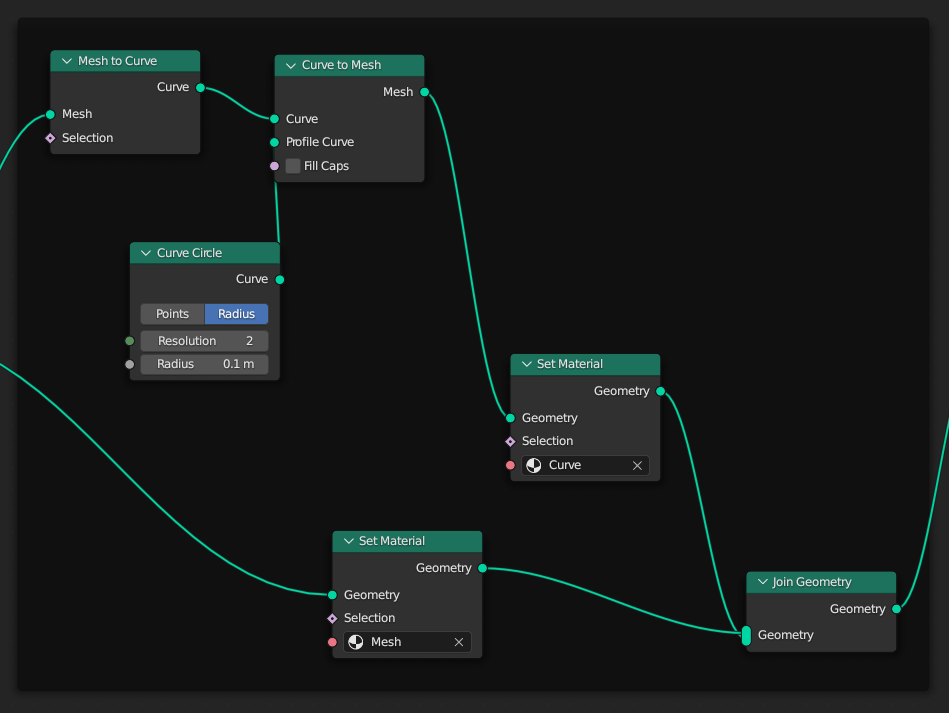
  
  - [This tutorial](https://www.youtube.com/watch?app=desktop&v=6oXkRIN_t0Y) to get a smooth rotation around the mesh.
  - [This tutorial](https://www.youtube.com/watch?v=COwENnPwWJ8) to adapt the camera movement at will.

**Note:** Add a plugin to blender following [these instructions](https://docs.blender.org/manual/en/latest/editors/preferences/addons.html#rd-party-add-ons).





## Set-up

In [2]:
import os
import subprocess

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)
os.chdir(gitroot_path[:-1])
print("Working directory: ", os.getcwd())

import warnings

warnings.filterwarnings("ignore")

import sys

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)

Working directory:  /Volumes/GoogleDrive/My Drive/code/my28brains
Directory added to path:  /Volumes/GoogleDrive/My Drive/code


## Imports

In [3]:
import glob
from time import sleep

import numpy as np
import open3d as o3d
import trimesh

import my28brains.viz as viz

CENTERED_MESHES_DIR = os.path.join(os.getcwd(), "data", "registered_meshes")
print("CENTERED_MESHES_DIR: ", CENTERED_MESHES_DIR)

CENTERED_MESHES_DIR:  /Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes


## Visualize one mesh

In [ ]:
hemisphere = "left"
structure_id = -1
string_base = os.path.join(
    CENTERED_MESHES_DIR, f"{hemisphere}_structure_{structure_id}_sub-01_ses-**.ply"
)
paths = sorted(glob.glob(string_base))

print(
    f"Found {len(paths)} ply files for {hemisphere} hemisphere and anatomical structure {structure_id}:\n {paths}\n"
)

error_ply_path = paths[8]
mesh = o3d.io.read_triangle_mesh(ply_path)

mesh.compute_vertex_normals()
mesh.paint_uniform_color([1, 0.706, 0])

o3d.visualization.draw_geometries([mesh])

## Create an animation with point clouds

This is computationally expensive.

In [4]:
hemisphere = "left"
structure_id = -1
mesh_dir = REGISTERED_MESHES_DIR

string_base = os.path.join(
    REGISTERED_MESHES_DIR, f"{hemisphere}_structure_{structure_id}_sub-01_ses-**.ply"
)
paths = sorted(glob.glob(string_base))

print(f"Found {len(paths)} ply files:\n {paths}\n")

vis = o3d.visualization.Visualizer()
vis.create_window()

pcd = o3d.io.read_point_cloud(paths[0])
vis.add_geometry(pcd)
vis.poll_events()
vis.update_renderer()

for path in paths[1:]:
    sleep(1)
    pcd.points = o3d.io.read_point_cloud(path).points
    vis.update_geometry(pcd)
    vis.poll_events()
    vis.update_renderer()

Found 27 ply files:
 ['/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-02.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-03.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-04.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-05.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-06.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-07.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-08.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-09.ply', '/Volumes/GoogleDrive/My Drive/code/my28brains/data/registered_meshes/left_structure_-1_sub-01_ses-10.ply', '/Volu